In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

Importando as bibliotecas necessárias

In [21]:
imagem1 = cv2.imread(r'1975.png')
imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)

imagem2 = cv2.imread(r'2003.png')
imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

Lendo a imagem antiga e a imagem atual da área

In [13]:
def contarArvores(imagem):
  imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

  imagem_suavizada = cv2.blur(imagem_cinza, (1,1))

  _, imagem_limiar = cv2.threshold(imagem_suavizada, 40, 10, cv2.THRESH_BINARY)

  contornos, _ = cv2.findContours(imagem_limiar, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  imagem_contorno = imagem.copy()
  contador = 0

  for contorno in contornos:
      (x,y,w,h) = cv2.boundingRect(contorno)
      
      area = cv2.contourArea(contorno)

      if area > 0 and area < 1000 :
          razao_contorno = w/h

          if razao_contorno > 0.01 and razao_contorno < 5:
              
              cv2.circle(imagem_contorno, (x,y), 1, (0,255,0), 2)
              contador += 1
  
  plt.imshow(imagem_contorno, cmap='gray')
  return contador

Definindo uma função que vai buscar os contornos da imagem e fazer a contagem para cada imagem

Arvores imagem 1:  21425


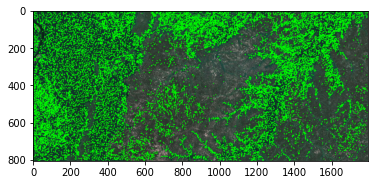

In [22]:
arvores1 = contarArvores(imagem1)

print('Arvores imagem 1: ', arvores1)


Arvores imagem 2:  5684


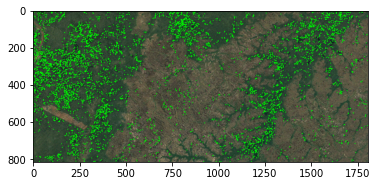

In [23]:
arvores2 = contarArvores(imagem2)
print('Arvores imagem 2: ', arvores2)

In [24]:
diff = abs(arvores1 - arvores2)
print(diff)

if diff >= 500 and diff <= 1000:
  print('Desmatamento leve')
elif diff > 1000 and diff <= 2000:
   print('Desmatamento moderado')
else:
  print('Desmatamento elevado')

15741
Desmatamento elevado
